## Data Science Job Postings with Salaries (2025)
### Scraped Data Science Job Postings with Salaries for ML & Career Analytics (2025)
#### Data may be found here: https://www.kaggle.com/datasets/elahehgolrokh/data-science-job-postings-with-salaries-2025

In [486]:
# import libraries needed for EDA

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Core data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import bokeh.plotting as bkp
import altair as alt


# Statistics
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [487]:
# load data into dataframe

df = pd.read_csv("data_science_job_posts_2025.csv")

In [488]:
# examine first 10 rows

df.head(10)

,job_title,seniority_level,status,company,location,post_date,headquarter,industry,ownership,company_size,revenue,salary,skills
0,data scientist,senior,hybrid,company_003,"Grapevine, TX . Hybrid",17 days ago,"Bentonville, AR, US",Retail,Public,€352.44B,Public,"€100,472 - €200,938","['spark', 'r', 'python', 'scala', 'machine lea..."
1,data scientist,lead,hybrid,company_005,"Fort Worth, TX . Hybrid",15 days ago,"Detroit, MI, US",Manufacturing,Public,"155,030",€51.10B,"€118,733","['spark', 'r', 'python', 'sql', 'machine learn..."
2,data scientist,senior,on-site,company_007,"Austin, TX . Toronto, Ontario, Canada . Kirkla...",a month ago,"Redwood City, CA, US",Technology,Public,"25,930",€33.80B,"€94,987 - €159,559","['aws', 'git', 'python', 'docker', 'sql', 'mac..."
3,data scientist,senior,hybrid,company_008,"Chicago, IL . Scottsdale, AZ . Austin, TX . Hy...",8 days ago,"San Jose, CA, US",Technology,Public,"34,690",€81.71B,"€112,797 - €194,402","['sql', 'r', 'python']"
4,data scientist,NaN,on-site,company_009,On-site,3 days ago,"Stamford, CT, US",Finance,Private,"1,800",Private,"€114,172 - €228,337",[]
5,data scientist,lead,NaN,company_013,"New York, NY",3 months ago,"New York, NY, US",Technology,Private,150,€2.16B,"€196,371 - €251,170","['scikit-learn', 'python', 'scala', 'sql', 'ma..."
6,data scientist,junior,NaN,company_014,"Berkeley, CA",15 days ago,"Berkeley, CA, US",Education,NaN,"17,471",Education,"€51,330 - €70,144",[]
7,machine learning engineer,senior,on-site,company_015,"Menlo Park, CA",9 days ago,"Menlo Park, CA, US",Technology,Public,900,Public,"€121,480 - €132,440",['machine learning']
8,data scientist,senior,remote,company_019,Fully Remote,6 days ago,"Boston, MA, US",Technology,Private,126,Private,"€207,331",[]
9,data scientist,senior,on-site,company_021,On-site,a day ago,"San Francisco, CA, US",Technology,Public,"5,520",€61.06B,"€219,201",[]


In [489]:
df.shape

(944, 13)

In [490]:
# List all columns and their data types

df.dtypes.reset_index().rename(columns={'index': 'Column', 0: 'DataType'})

,Column,DataType
0,job_title,object
1,seniority_level,object
2,status,object
3,company,object
4,location,object
5,post_date,object
6,headquarter,object
7,industry,object
8,ownership,object
9,company_size,object


### The 'location' column can be dropped, as it contains the info already in 'status' and repeats the country info in 'headquarter', which we will rename 'headquarters'.

In [492]:
# Drop 'location' column
df = df.drop(columns=["location"])

# Rename 'headquarter' to 'headquarters'
df = df.rename(columns={"headquarter": "headquarters"})

### Now check for missing values:

In [494]:
# Count null values per column

null_counts = df.isnull().sum().reset_index()
null_counts.columns = ["Column", "NullValues"]
null_counts


,Column,NullValues
0,job_title,3
1,seniority_level,60
2,status,256
3,company,0
4,post_date,0
5,headquarters,0
6,industry,0
7,ownership,47
8,company_size,0
9,revenue,15


### We will drop the null values in 'job_title' and 'revenue' and change null values in 'seniority_level', 'status' and 'ownership to 'unknown'.

In [496]:
# Drop rows where 'job_title' or 'revenue' is null
df = df.dropna(subset=["job_title", "revenue"])

# Replace nulls in 'seniority_level', 'status', and 'ownership' with 'unknown'
df["seniority_level"] = df["seniority_level"].fillna("unknown")
df["status"] = df["status"].fillna("unknown")
df["ownership"] = df["ownership"].fillna("unknown")

In [497]:
# Count null values per column

null_counts = df.isnull().sum().reset_index()
null_counts.columns = ["Column", "NullValues"]
null_counts


,Column,NullValues
0,job_title,0
1,seniority_level,0
2,status,0
3,company,0
4,post_date,0
5,headquarters,0
6,industry,0
7,ownership,0
8,company_size,0
9,revenue,0


### We will now have the 'headquarters' column show only the country code for the location.

In [499]:
# Keep only the last part after the last comma in 'headquarters' (assumed to be the country)
df["headquarters"] = df["headquarters"].apply(lambda x: str(x).split(",")[-1].strip())

# Preview unique values to confirm transformation
df["headquarters"].unique()[:20]


array(['US', 'CA', 'SE', 'CH', 'IN', 'GB', 'DK', 'DE', 'TW', 'NL', 'AU',
       'EE', 'FR', 'SG', 'IT', 'BR', 'AT', 'JP', 'IE', 'ES'], dtype=object)

### Let's convert the country codes into full names:

In [501]:
# Dictionary mapping 2-letter codes to full country names
country_map = {
    "US": "United States",
    "CA": "Canada",
    "SE": "Sweden",
    "CH": "Switzerland",
    "IN": "India",
    "GB": "United Kingdom",
    "DK": "Denmark",
    "DE": "Germany",
    "TW": "Taiwan",   
    "NL": "Netherlands",
    "AU": "Australia",
    "EE": "Estonia",
    "FR": "France",
    "SG": "Singapore",
    "IT": "Italy",
    "BR": "Brazil",
    "AT": "Austria",
    "JP": "Japan",
    "IE": "Ireland",
    "ES": "Spain"
    # add more codes if needed
}

# Map headquarters column using dictionary
df["headquarters"] = df["headquarters"].map(country_map).fillna(df["headquarters"])

# Preview unique values
print(df["headquarters"].unique()[:20])


['United States' 'Canada' 'Sweden' 'Switzerland' 'India' 'United Kingdom'
 'Denmark' 'Germany' 'Taiwan' 'Netherlands' 'Australia' 'Estonia' 'France'
 'Singapore' 'Italy' 'Brazil' 'Austria' 'Japan' 'Ireland' 'Spain']


### The 'skills' column is problematic: Some cells contain many items, some are empty lists. We will replace the column's values with the number of items in the lists.

In [503]:
import ast

# Function to count items in list-like strings
def count_skills(value):
    try:
        skills_list = ast.literal_eval(value)  # safely evaluate string to Python list
        if isinstance(skills_list, list):
            return len(skills_list)
        return 0
    except:
        return 0  # if parsing fails, treat as empty

# Apply to 'skills' column
df["skills"] = df["skills"].apply(count_skills)

In [504]:
# List all columns and their data types

df.dtypes.reset_index().rename(columns={'index': 'Column', 0: 'DataType'})

,Column,DataType
0,job_title,object
1,seniority_level,object
2,status,object
3,company,object
4,post_date,object
5,headquarters,object
6,industry,object
7,ownership,object
8,company_size,object
9,revenue,object


### The 'salary' column is also problematic: It needs to be converted to numerical data, and if there is a range given we will use the mean of the range.

In [506]:
import re
import numpy as np
import pandas as pd

def normalize_salary_text(s: str) -> str:
    """Remove currency symbols/words and normalize 'k' shorthand."""
    if not isinstance(s, str):
        return ""
    t = s.strip()
    # Normalize dashes
    t = t.replace("–", "-").replace("—", "-").replace(" to ", "-")
    # Remove common currency symbols/words
    t = re.sub(r'(€|\$|£|\bEUR\b|\bUSD\b|\bGBP\b|per\s*year|/year|yr|/mo|per\s*month|monthly)', '', t, flags=re.IGNORECASE)
    # Expand 55k -> 55000
    def k_to_num(m):
        return str(float(m.group(1)) * 1000)
    t = re.sub(r'(\d+(?:\.\d+)?)\s*[kK]\b', k_to_num, t)
    # Remove commas and extra spaces
    t = t.replace(",", " ")
    t = re.sub(r'\s+', ' ', t).strip()
    return t

def parse_salary_to_number(s):
    """Return a float salary by taking the mean if a range is given, else single value. NaN if no numbers."""
    if pd.isna(s):
        return np.nan
    t = normalize_salary_text(s)
    # Extract numbers (allow decimals)
    nums = re.findall(r'\d+(?:\.\d+)?', t)
    if not nums:
        return np.nan
    vals = [float(x) for x in nums]

    if len(vals) > 2:
        # Try to reconstruct by joining pairs like [50,000] -> 50000
        tokens = re.findall(r'\d+(?:\.\d+)?', t)
        # Re-parse from original cleaned string by removing spaces within numbers
        t2 = re.sub(r'(\d)\s+(\d{3}\b)', r'\1\2', t)  # turn "50 000" into "50000"
        nums2 = re.findall(r'\d+(?:\.\d+)?', t2)
        vals = [float(x) for x in nums2]
    # Use mean if range (2+ numbers), else the single number
    if len(vals) >= 2:
        return float(np.mean([vals[0], vals[1]]))
    return float(vals[0])

# Apply conversion
original_non_null = df['salary'].notna().sum()
df['salary_num'] = df['salary'].apply(parse_salary_to_number)

# Report summary
summary = {
    "rows_total": len(df),
    "salary_non_null_before": int(original_non_null),
    "salary_parsed_non_null": int(df['salary_num'].notna().sum()),
    "salary_unparsed_nulls": int(df['salary_num'].isna().sum())
}

df['salary'] = df['salary_num']
df = df.drop(columns=['salary_num'])

summary, df['salary'].head(10), df['salary'].dtype


({'rows_total': 926,
  'salary_non_null_before': 926,
  'salary_parsed_non_null': 926,
  'salary_unparsed_nulls': 0},
 0    150705.0
 1       425.5
 2    127273.0
 3    153599.5
 4    171254.5
 5    223770.5
 6     60737.0
 7    126960.0
 8       269.0
 9       210.0
 Name: salary, dtype: float64,
 dtype('float64'))

In [507]:
# List all columns and their data types

df.dtypes.reset_index().rename(columns={'index': 'Column', 0: 'DataType'})

,Column,DataType
0,job_title,object
1,seniority_level,object
2,status,object
3,company,object
4,post_date,object
5,headquarters,object
6,industry,object
7,ownership,object
8,company_size,object
9,revenue,object


### The 'revenue' column contains some numerical data, but many cells which contain info like 'private' and 'education'. We will drop this column. Also, we will make sure company_size contains only numerical values.

In [509]:
# Drop 'revenue' column
df = df.drop(columns=["revenue"])

# Convert 'company_size' to numeric values
# Many company_size entries are ranges (e.g., "51-200") or open-ended ("10000+").
# We'll replace ranges with their midpoint, and "10000+" with 10000.

def clean_company_size(value):
    if pd.isna(value):
        return np.nan
    text = str(value).replace(",", "").strip()
    if "-" in text:  # range case
        parts = text.split("-")
        try:
            nums = [int(p) for p in parts if p.isdigit() or p.isnumeric()]
            if len(nums) == 2:
                return int(np.mean(nums))
        except:
            return np.nan
    if text.endswith("+"):  # e.g., "10000+"
        try:
            return int(text[:-1])
        except:
            return np.nan
    try:
        return int(text)
    except:
        return np.nan

df["company_size"] = df["company_size"].apply(clean_company_size)

# Verify transformation
df["company_size"].head(10), df["company_size"].dtype


(0         NaN
 1    155030.0
 2     25930.0
 3     34690.0
 4      1800.0
 5       150.0
 6     17471.0
 7       900.0
 8       126.0
 9      5520.0
 Name: company_size, dtype: float64,
 dtype('float64'))

### In company_size, we'll fill in any NaN values with the median of the column:

In [511]:
# Fill NaN values in 'company_size' with median
median_size = df["company_size"].median()
df["company_size"] = df["company_size"].fillna(median_size)

# Verify no nulls remain
df["company_size"].isnull().sum(), df["company_size"].head(10)

(0,
 0     20040.0
 1    155030.0
 2     25930.0
 3     34690.0
 4      1800.0
 5       150.0
 6     17471.0
 7       900.0
 8       126.0
 9      5520.0
 Name: company_size, dtype: float64)

### Now let's see what the dataframe looks like:

In [513]:
df.head(10)

,job_title,seniority_level,status,company,post_date,headquarters,industry,ownership,company_size,salary,skills
0,data scientist,senior,hybrid,company_003,17 days ago,United States,Retail,Public,20040.0,150705.0,6
1,data scientist,lead,hybrid,company_005,15 days ago,United States,Manufacturing,Public,155030.0,425.5,5
2,data scientist,senior,on-site,company_007,a month ago,United States,Technology,Public,25930.0,127273.0,9
3,data scientist,senior,hybrid,company_008,8 days ago,United States,Technology,Public,34690.0,153599.5,3
4,data scientist,unknown,on-site,company_009,3 days ago,United States,Finance,Private,1800.0,171254.5,0
5,data scientist,lead,unknown,company_013,3 months ago,United States,Technology,Private,150.0,223770.5,6
6,data scientist,junior,unknown,company_014,15 days ago,United States,Education,unknown,17471.0,60737.0,0
7,machine learning engineer,senior,on-site,company_015,9 days ago,United States,Technology,Public,900.0,126960.0,1
8,data scientist,senior,remote,company_019,6 days ago,United States,Technology,Private,126.0,269.0,0
9,data scientist,senior,on-site,company_021,a day ago,United States,Technology,Public,5520.0,210.0,0


### Finally, we'll remove 'post_date', since these are all from 2025 anyway, then we'll save this as our cleaned dataset.

In [515]:
df = df.drop(columns=["post_date"])

In [516]:
df.head()

,job_title,seniority_level,status,company,headquarters,industry,ownership,company_size,salary,skills
0,data scientist,senior,hybrid,company_003,United States,Retail,Public,20040.0,150705.0,6
1,data scientist,lead,hybrid,company_005,United States,Manufacturing,Public,155030.0,425.5,5
2,data scientist,senior,on-site,company_007,United States,Technology,Public,25930.0,127273.0,9
3,data scientist,senior,hybrid,company_008,United States,Technology,Public,34690.0,153599.5,3
4,data scientist,unknown,on-site,company_009,United States,Finance,Private,1800.0,171254.5,0


______________________________________________________________________________________________________________________________________
______________________________________________________________________________________________________________________________________

### Here are the summary stats for the numeric columns:

In [519]:
stats_summary = numeric_df.describe().T
print(stats_summary)


              count          mean            std   min     25%       50%  \
company_size  921.0  92198.578719  176250.207114   5.0  1800.0   20040.0   
salary        921.0  91921.389794   82150.615845  27.0   396.0  107357.0   
skills        921.0      4.448426       3.669469   0.0     1.0       4.0   

                   75%       max  
company_size   93580.0  865476.0  
salary        161453.0  283481.5  
skills             7.0      17.0  


### Let's look at the pairplots, coefficients, and trend lines for our numeric columns:

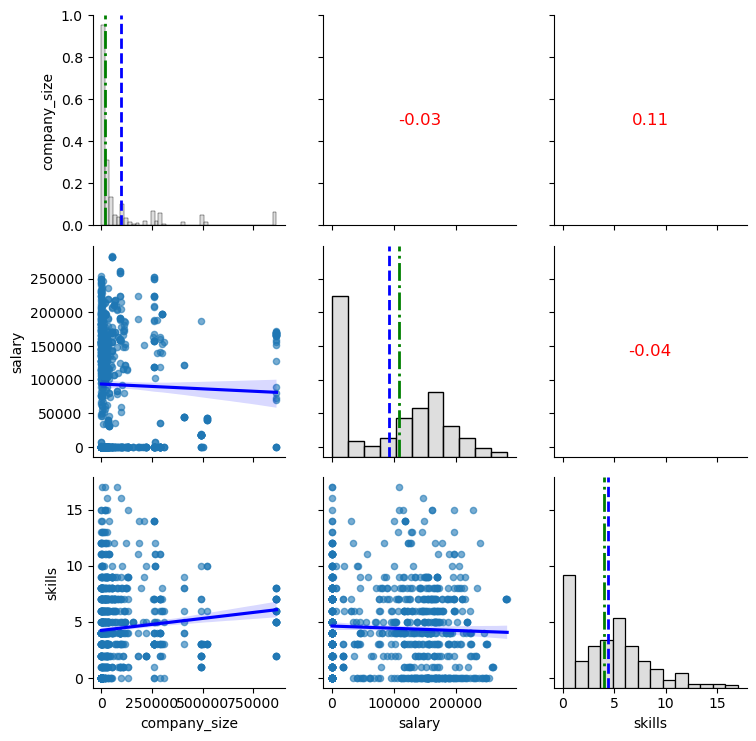

In [521]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

g = sns.PairGrid(numeric_df)

# Lower triangle: scatterplots with regression lines
g.map_lower(sns.regplot, scatter_kws={'s': 20, 'alpha': 0.6}, line_kws={"color":"blue"})

# Custom diagonal with mean/median lines
def diag_hist(x, **kwargs):
    ax = plt.gca()
    sns.histplot(x, ax=ax, kde=False, color="lightgray", edgecolor="black")
    
    mean_val = np.mean(x)
    median_val = np.median(x)
    
    ax.axvline(mean_val, color="blue", linestyle="--", linewidth=2, label=f"Mean: {mean_val:.2f}")
    ax.axvline(median_val, color="green", linestyle="-.", linewidth=2, label=f"Median: {median_val:.2f}")
    
    # Only show legend once per diagonal
    if ax == g.axes[0,0]:
        ax.legend()

g.map_diag(diag_hist)

# Upper triangle: correlation coefficients
def corr_coef(x, y, **kwargs):
    r = np.corrcoef(x, y)[0, 1]
    ax = plt.gca()
    ax.annotate(f"{r:.2f}", xy=(0.5, 0.5), xycoords=ax.transAxes,
                ha="center", va="center", fontsize=12, color="red")

g.map_upper(corr_coef)

plt.show()



### A few observations on the above graphs:
- The shapes of the histograms are unsurprising:
  - Company size is left-skewed, with the mean at about half the median.
  - Salary has only a slight right skew, due to the large bar at the left balancing the higher salary counts.
  - Skills is a smilar shape, with what would be a right skew balanced by the large column at the left end. Median and mean are very close.
- The correlations are all negligible. It is hard not to comment, though, on the (very) slight negative correlation of salary over company size.

_____________________________________________________________________________________________________________________________
_____________________________________________________________________________________________________________________________

### We'll now examine the categorical features, starting with bar graphs of job posting counts. We limit ourselves to the top 20 companies because there are many unique values.

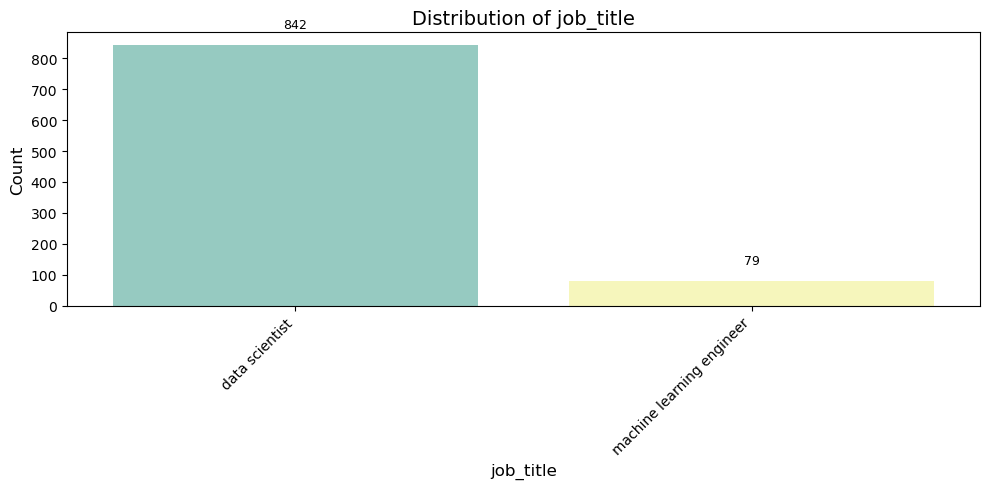

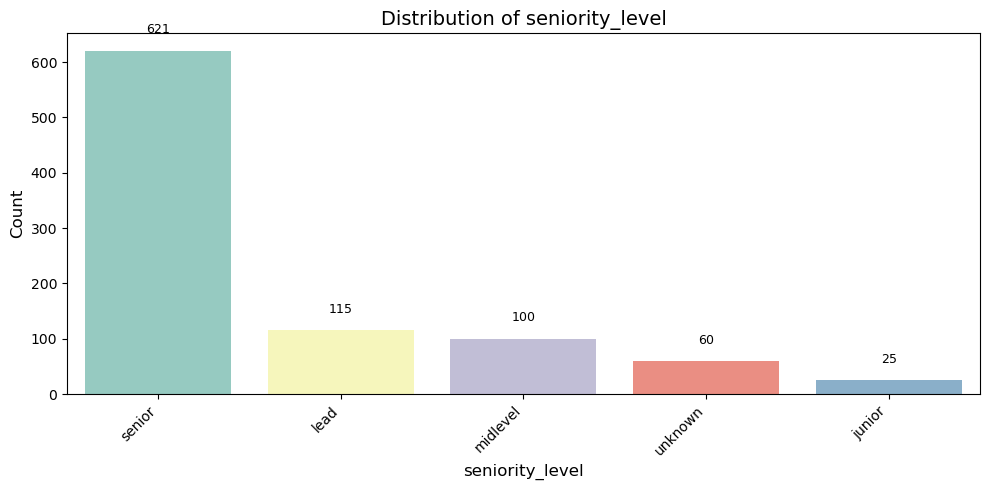

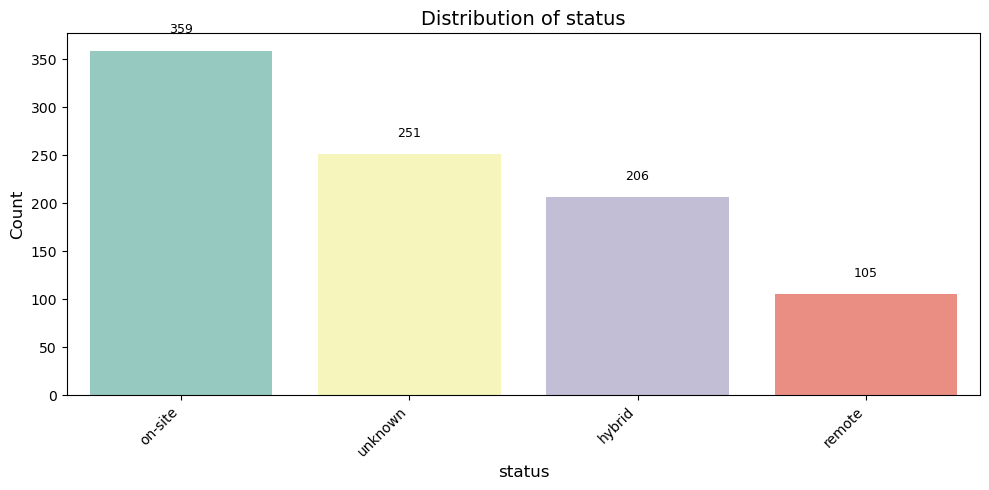

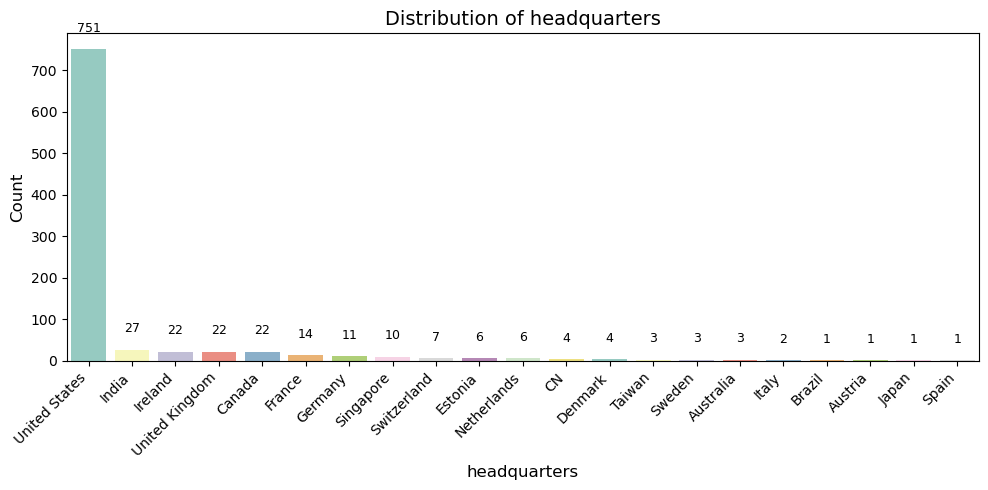

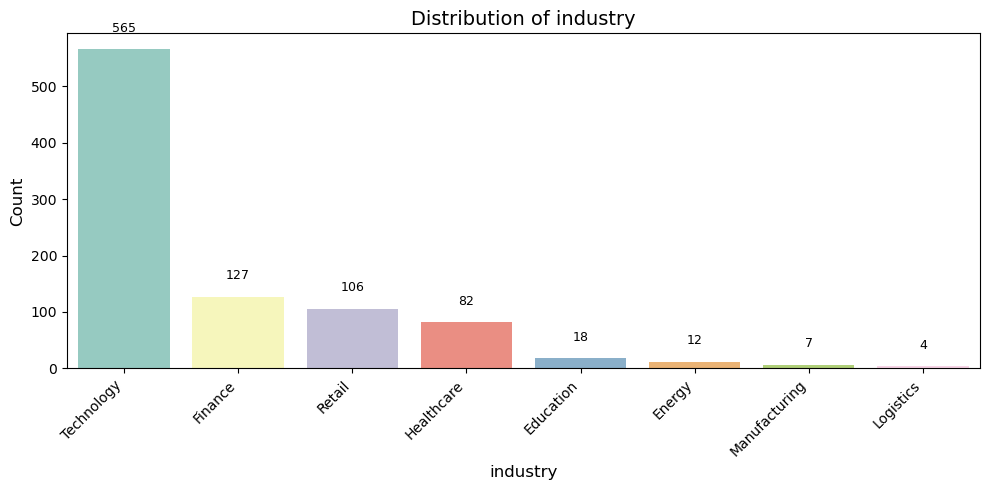

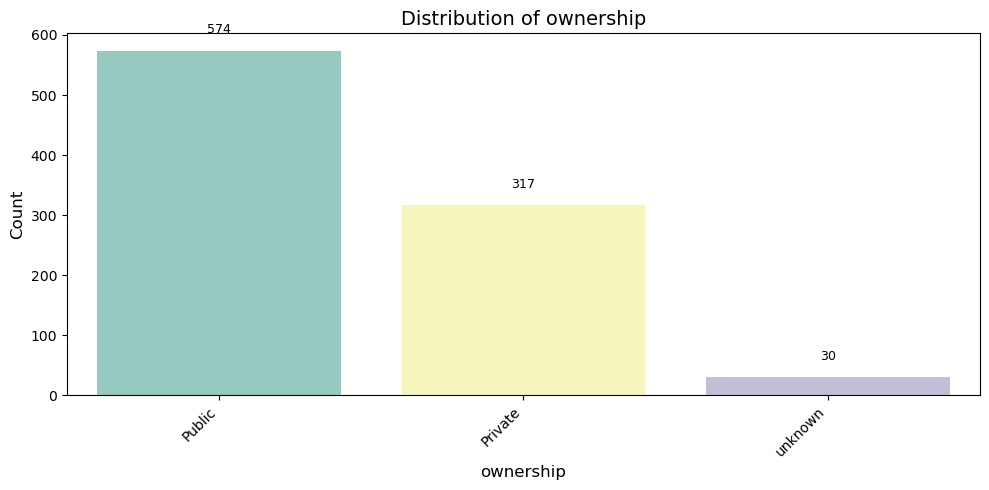

In [558]:
for col in cat_df.columns:
    
    if col.lower() == "company":
        continue  
    
    plt.figure(figsize=(10, 5))
    order = df[col].value_counts().index  
    
    sns.countplot(data=df, x=col, order=order, palette="Set3")
    
    plt.title(f"Distribution of {col}", fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.xticks(rotation=45, ha="right")
    
    # Add counts above bars
    for p in plt.gca().patches:
        plt.gca().annotate(f'{int(p.get_height())}',
                           (p.get_x() + p.get_width() / 2., p.get_height()),
                           ha='center', va='center',
                           fontsize=9, color='black', xytext=(0, 15),
                           textcoords='offset points')
    
    plt.tight_layout()
    plt.show()


### A few observations on the above graphs:
- Data scientist is overwhelmingly the largest category.
- Again, a huge majority of the listings are for senior positions.
- Work status is fairly evenly distributed, though the items in "Unknown" could tilt the scales.
- Clearly the vast majority of the listings are from the US. This shows only the top 20 categories.
- Tech is the leading industry, followed by fields one would expect to see.
- Ownership is mainly public, though over a third of the companies are private.

### Since there are only 4 data engineer and 1 data analyst job, we will drop those features.

In [528]:
# Permanently drop rows where job_title is Data Engineer or Data Analyst
df = df.loc[~df["job_title"].str.lower().isin(["data engineer", "data analyst"])].reset_index(drop=True)

numeric_df = df.select_dtypes(include=['float64', 'int64'])
cat_df = df.select_dtypes(include=['object'])


### Now we'll look at salaries by job titles, again looking only at the top 20 countries:

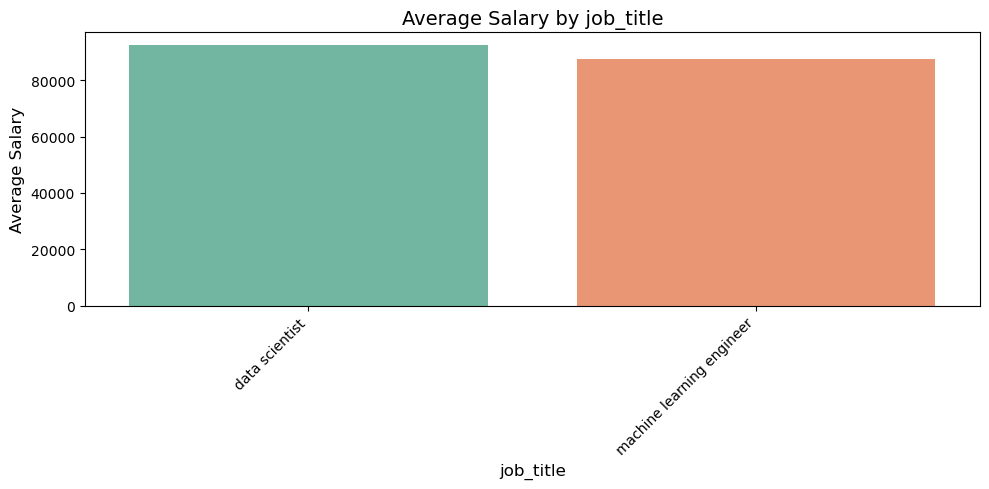

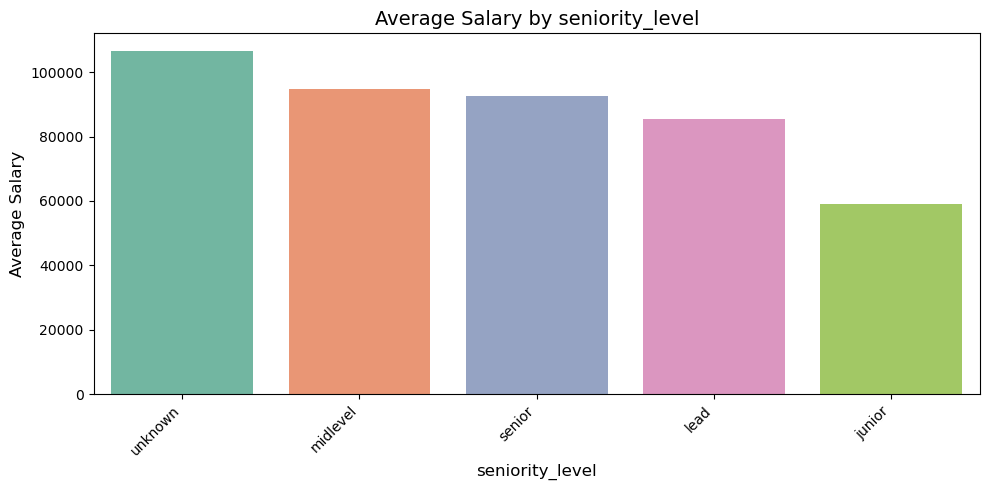

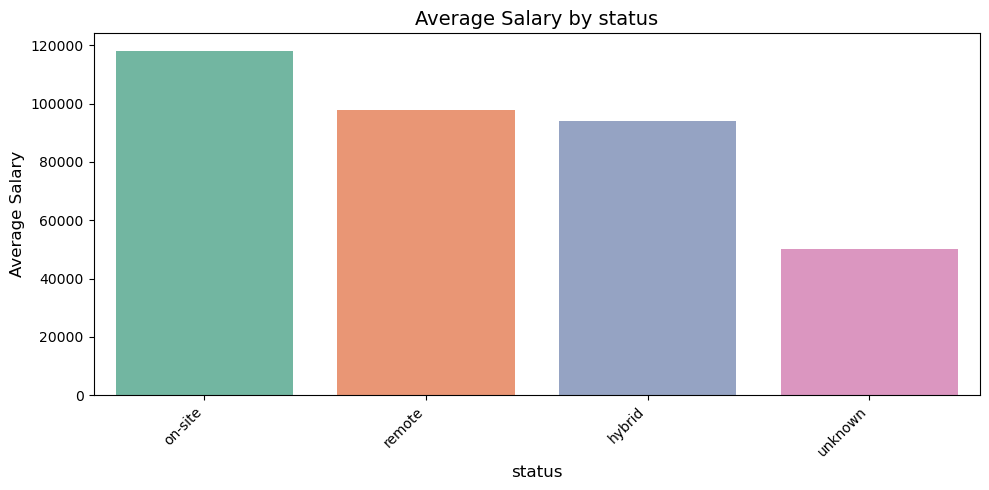

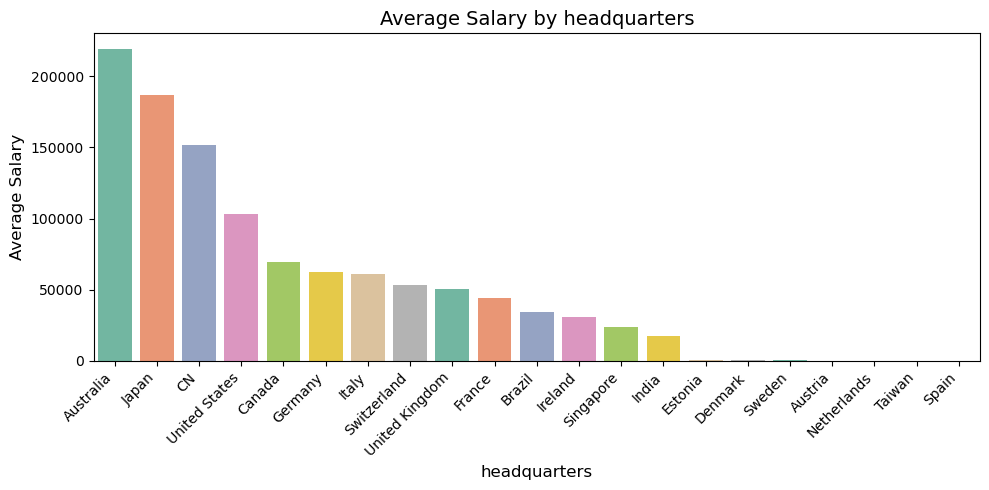

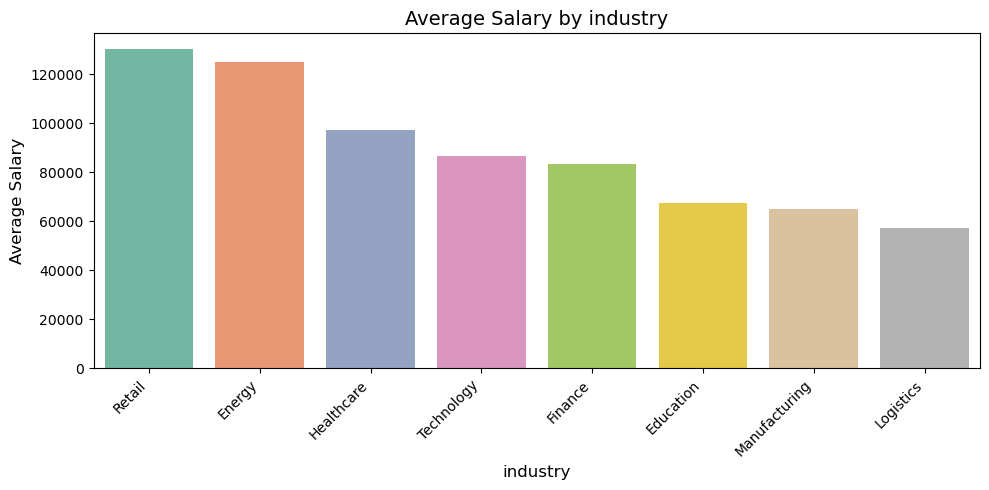

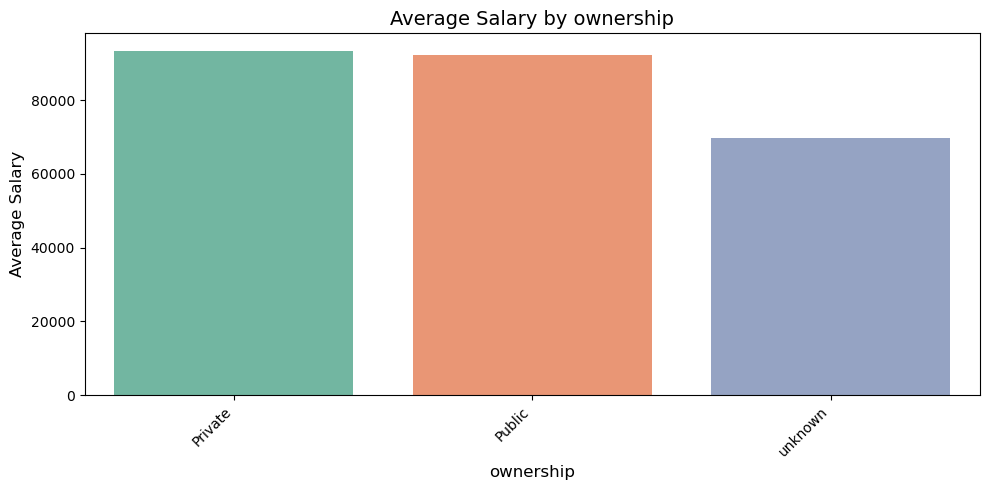

In [561]:
for col in cat_df.columns:
    if col.lower() == "company":
        continue  
    
    plt.figure(figsize=(10, 5))
    
    # Sort categories by mean salary (descending)
    order = df.groupby(col)["salary"].mean().sort_values(ascending=False).index
    
    sns.barplot(data=df, x=col, y="salary", palette="Set2",
                estimator=np.mean, ci=None, order=order)
    
    plt.title(f"Average Salary by {col}", fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Average Salary", fontsize=12)
    plt.xticks(rotation=45, ha="right")
    
    plt.tight_layout()
    plt.show()
